# 4章の章末問題解答

### (1)本書用に公開されているデータを用いて，購買金額による顧客のデシル分析をせよ。上位ランクおよび下位ランクの顧客に特有の購買行動について論じよ。

In [1]:
# ここでは，本文同様sec4-1data.csvを用いてデシルランクの最上位と最下位を抽出し中分類名ごとの平均購買金額から購買行動の違いを評価した．
# 結果に示すように，上位ランクは多くの中分類カテゴリで上位ランクの購買が大きく上回っている．
# 特に，下位ランクではまったく買われていない中分類も散見され，上位ランクとの差がはっきりしている．

import pandas as pd
import numpy as np

# データの読み込み
df_decile_data = pd.read_csv('in/sec4-1data.csv')

# モニタ別金額集計
df_decile_groupby = df_decile_data.groupby('モニタ')
decile = df_decile_groupby.agg({'金額': 'sum'})

# 4.2 デシル分析の各ランクの閾値とモニタ別のランクの計算
ds = decile.reset_index(drop=True)
decile_rank, bins = pd.qcut(ds['金額'], 10, retbins=True, labels=False)
ds['rank'] = decile_rank + 1

# モニタ別・中分類名別の集計と該当なしの場合に0を代入
amount = pd.pivot_table(df_decile_data, values='金額',
                        index='モニタ',  columns='中分類名',  aggfunc='sum').fillna(0)

# 行名を変更し，金額集計表とランクを結合
ds.index = list(amount.index)
amount2 = pd.concat([amount, ds['rank']], axis=1)

# 上位クラスと下位クラスの抽出
high = amount2[amount2['rank'] == amount2['rank'].max()]
low = amount2[amount2['rank'] == amount2['rank'].min()]

high_mean = high.drop(columns='rank').mean(axis=0)
low_mean = low.drop(columns='rank').mean(axis=0)

# 比較
result = pd.concat([high_mean, low_mean], axis=1)
result.columns = ['high', 'low']
result

,high,low
その他日用品,0.000000,0.000000
その他食品,12200.090909,0.000000
ペット用品,2204.090909,0.000000
加工食品,83888.454545,144.909091
化粧品,13251.090909,0.000000
家具,0.000000,0.000000
家庭用品,3743.363636,0.000000
家電,435.090909,0.000000
寝具・寝装品,0.000000,0.000000
文具・事務用品・情報文具,268.727273,0.000000


### (2)4.2節（ロジスティック分析）および4.3節（決定木分析）はいずれもクラス判別のためのモデルであるため，データを入れ替えても分析ができる。そこで，sec4-2data.csvを用いて決定木分析を，またsec4-3data.csvを用いてロジスティック回帰分析をせよ。

In [2]:
# モジュールの読み込み
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import tree

# ロジスティック回帰分析
# データの読み込み
df_logi = pd.read_csv('in/sec4-3data.csv')

# ロジスティック回帰分析
# 目的変数
y = df_logi.iloc[:, 2]

# 説明変数
# 説明変数の設定　ここでは性別と家族の有無のみ利用
X1 = df_logi.iloc[:, 3]
X2 = df_logi.iloc[:, 6:]
X = pd.concat([X1, X2], axis=1)
# X = df_logi.iloc[:,[3,6:11]]

# ロジスティック回帰分析のモデルの設定
logistic_model = sm.Logit(y, sm.add_constant(X))

# パラメータの求解
logistic_res = logistic_model.fit()

# 分析結果の概要の出力
logistic_res.summary()

Optimization terminated successfully.
         Current function value: 0.592635
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  購入の有無   No. Observations:                  486
Model:                          Logit   Df Residuals:                      479
Method:                           MLE   Df Model:                            6
Date:                Fri, 03 Sep 2021   Pseudo R-squ.:                 0.03313
Time:                        20:12:50   Log-Likelihood:                -288.02
converged:                       True   LL-Null:                       -297.89
Covariance Type:            nonrobust   LLR p-value:                  0.003082
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1853      0.511     -4.275      0.000      -3.187      -1.183
性別             0.7843      0.204      3.848      0.000       0.385       1.184
乳幼児有無         -0.4877      0.345     -1.414      0.157      -1.164       0.188
小学生有無          0.1689      0.315      0.536      0.592      -0.449       0.787
中高生有無          0.3208      0.291      1.102      0.270      -0.250       0.891
大人有無           0.2268      0.384      0.591      0.554      -0.525       0.979
老人有無          -0.1522      0.230     -0.663      0.507      -0.602       0.298
==============================================================================
"""

In [3]:
# 決定木分析
# データの読み込み
df_tree = pd.read_csv('in/sec4-2data.csv')

# 目的変数の設定
y = df_tree.iloc[:, 1]

# 説明変数の設定
X = df_tree.iloc[:, 2:]
# 説明変数をカテゴリ変数に変更
X = X.astype('category')

# 決定木の設定と実行
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
clf_res = clf.fit(X, y)

In [4]:
# 必要なモジュールのインストール（必要に応じて実行）
!pip install pydotplus
!pip install graphviz

You should consider upgrading via the '/usr/local/var/pyenv/versions/3.7.1/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/var/pyenv/versions/3.7.1/bin/python3.7 -m pip install --upgrade pip' command.


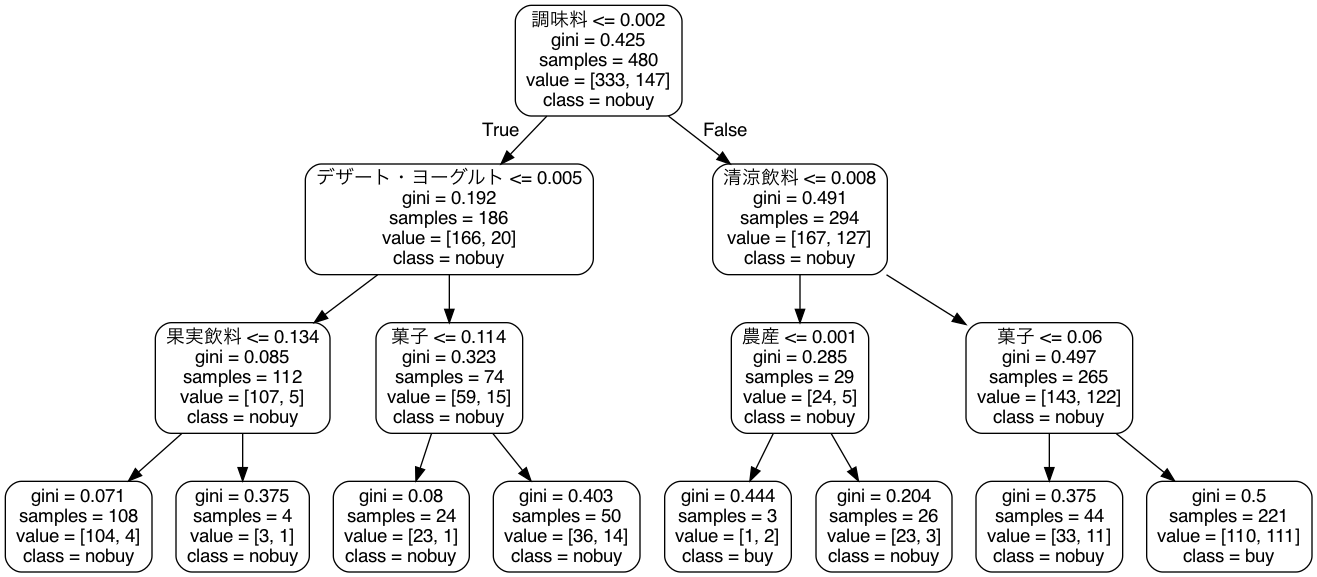

In [5]:
# 決定木グラフ表示のためのモジュール
import pydotplus
from IPython.display import Image
from graphviz import Digraph
import io

# 文字列を読み込める変数の生成
dot_data = io.StringIO()

# 得られた決定木をdotファイルに編集
dot_data = tree.export_graphviz(clf,  # 用いる結果
                                out_file=None,  # ファイルへの出力はなし
                                feature_names=X.columns,  # 説明変数名(日本語を使う場合)
                                class_names=['nobuy', 'buy'],  # 目的変数名（0, 1を変更）
                                rounded=True,  # ノードの角を丸くする
                                max_depth=3  # 表示する木の深さ
                                )

# dotファイルをPythonで読めるように取り出す
graph = pydotplus.graph_from_dot_data(dot_data)
# GraphVizのパスの設定（必要に応じて行う)
#graph.progs = {'dot': u"C:\\Program Files\\Graphviz\\bin\\dot.exe"}
# 日本語フォントの設定をするときは以下をコメントアウトする
graph.set_fontname('IPAGothic')
# ノードの日本語フォント設定
for node in graph.get_nodes():
    node.set_fontname('IPAGothic')
# エッジの日本語フォント設定
for e in graph.get_edges():
    e.set_fontname('IPAGothic')

# 画像ファイルを書き出す時は以下を実行
# graph.write_pdf("out/nm_dt_result.pdf") #pdfファイルの場合

# Jupyter Notebook上に決定木を表示
Image(graph.create_png())